<a href="https://colab.research.google.com/github/rraj78502/Alok/blob/master/Weather_Forecast_Using_NeuralProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install neuralprophet

     |████████████████████████████████| 61kB 3.8MB/s 
     |████████████████████████████████| 748.8MB 22kB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [3]:
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
melb = df[df['Location']=='Melbourne']
melb['Date'] = pd.to_datetime(melb['Date'])
melb.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,W,37.0,35.0,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,WSW,30.0,35.0,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,W,17.0,24.0,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,N,9.0,7.0,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,NNE,24.0,30.0,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


In [8]:
melb.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

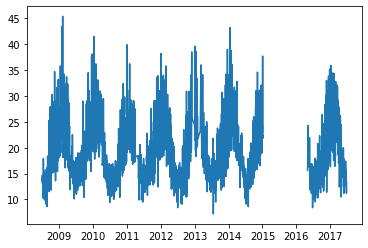

In [9]:
plt.plot(melb['Date'],melb['Temp3pm'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


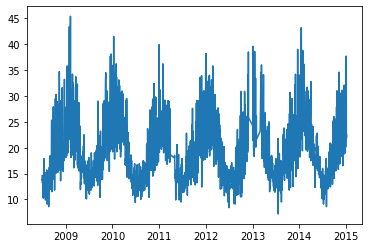

In [10]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [11]:
melb.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,W,37.0,35.0,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No,2008
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,WSW,30.0,35.0,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes,2008
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,W,17.0,24.0,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No,2008
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,N,9.0,7.0,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No,2008
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,NNE,24.0,30.0,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No,2008


In [12]:
melb.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
69846,2015-12-27,Melbourne,NaN,NaN,NaN,4.4,8.9,SSE,48.0,SSW,S,13.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69847,2015-12-28,Melbourne,NaN,NaN,NaN,6.0,13.3,SSE,39.0,S,SSW,20.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69848,2015-12-29,Melbourne,NaN,NaN,NaN,8.0,13.4,S,35.0,SSE,S,9.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69849,2015-12-30,Melbourne,NaN,NaN,NaN,7.0,12.4,SSE,44.0,E,S,6.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69850,2015-12-31,Melbourne,NaN,NaN,NaN,15.2,11.4,NNW,48.0,N,N,31.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [13]:
data = melb[['Date', 'Temp3pm']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


In [14]:
m = NeuralProphet()
model = m.fit(data, freq='D', epochs=1000)

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [02:20<00:00,  7.10it/s, SmoothL1Loss=0.0126, MAE=3.03, RegLoss=0]


In [15]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,25.820602,NaN,20.347599,5.253826,0.219177
1,2015-01-07,None,25.735315,NaN,20.348797,5.401202,-0.014685
2,2015-01-08,None,26.035452,NaN,20.349995,5.545309,0.140148
3,2015-01-09,None,26.123886,NaN,20.351194,5.685350,0.087343
4,2015-01-10,None,26.155205,NaN,20.352392,5.820558,-0.017744


In [16]:
future

,ds,y,t,y_scaled
0,2015-01-06,None,1.000420,None
1,2015-01-07,None,1.000841,None
2,2015-01-08,None,1.001261,None
3,2015-01-09,None,1.001681,None
4,2015-01-10,None,1.002102,None
...,...,...,...,...
895,2017-06-19,None,1.376629,None
896,2017-06-20,None,1.377049,None
897,2017-06-21,None,1.377470,None
898,2017-06-22,None,1.377890,None


In [17]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
895,2017-06-19,None,15.317198,NaN,21.419611,-5.754797,-0.347615
896,2017-06-20,None,15.841143,NaN,21.420809,-5.798843,0.219177
897,2017-06-21,None,15.568740,NaN,21.422007,-5.838581,-0.014685
898,2017-06-22,None,15.689354,NaN,21.423203,-5.873997,0.140148
899,2017-06-23,None,15.606640,NaN,21.424400,-5.905104,0.087343


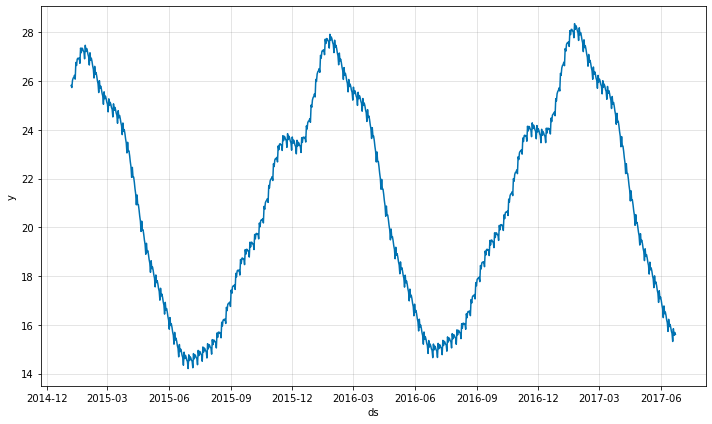

In [18]:
plot1 = m.plot(forecast)

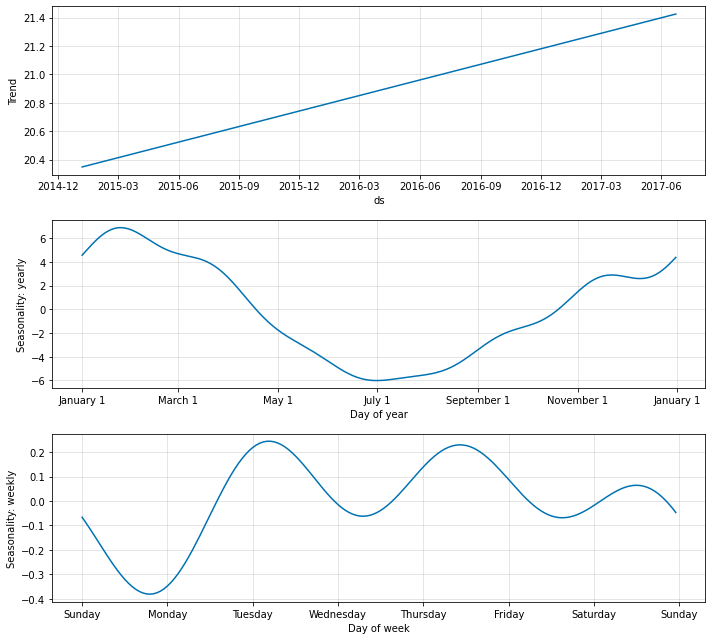

In [19]:
plot2 = m.plot_components(forecast)

In [20]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [21]:
del m

In [22]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

In [23]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,25.820602,NaN,20.347599,5.253826,0.219177
1,2015-01-07,None,25.735315,NaN,20.348797,5.401202,-0.014685
2,2015-01-08,None,26.035452,NaN,20.349995,5.545309,0.140148
3,2015-01-09,None,26.123886,NaN,20.351194,5.685350,0.087343
4,2015-01-10,None,26.155205,NaN,20.352392,5.820558,-0.017744


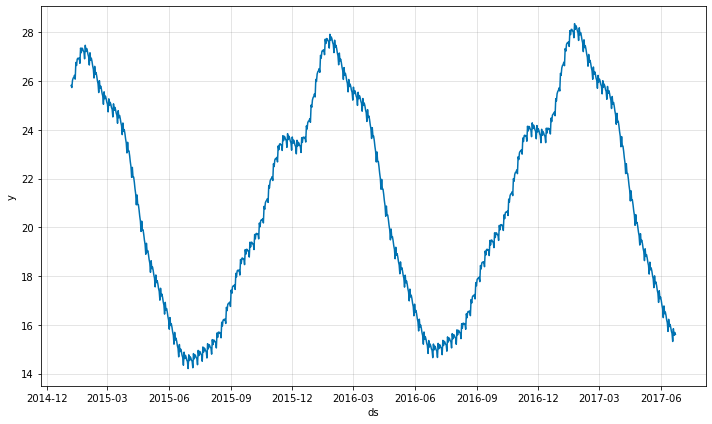

In [24]:
plot1 = m.plot(forecast)